In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
df = pd.read_csv('data_for_modeling.csv')
# df2= pd.read_csv('yad2_cars_data_final_cleaned.csv')

In [14]:
import numpy as np

# Function to find outliers using the IQR method
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]


In [15]:
# bool_cols = ['4x4', 'valid_test', 'magnesium_wheels', 'distance_control', 'economical', 'adaptive_cruise_control', 'cruise_control']
# df2[bool_cols] = df2[bool_cols].replace({True: 1, False: 0})
# df2


In [16]:
df = df.drop('Unnamed: 0', axis=1)
df

,brand,model,car_name,price,year,hand_num,horse_power,4x4,fuel_type,engine_volume,valid_test,magnesium_wheels,distance_control,economical,adaptive_cruise_control,cruise_control
0,Mercedes-Benz,A-Class,Mercedes A-Class,210000.0,2022,1,160.0,False,hybrid,1.3,True,False,False,False,False,False
1,BMW,7 Series,BMW 7 Series,284700.0,2019,1,258.0,False,hybrid,2.0,False,False,True,False,True,True
2,Alfa Romeo,Giulia,Alfa Romeo Giulia,92400.0,2018,1,197.0,False,petrol,2.0,False,True,True,True,False,False
3,Mercedes-Benz,S-Class,Mercedes S-Class,285900.0,2017,2,258.0,False,diesel,3.0,False,True,True,True,False,False
4,BMW,3 Series,BMW 3 Series,299000.0,2024,1,156.0,False,petrol,2.0,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15457,Toyota,Yaris,Toyota Yaris Cross,120000.0,2023,2,92.0,False,petrol,1.5,False,False,True,False,True,True
15458,Toyota,Aygo Aygo,Toyota Aygo (AYGO),19900.0,2013,4,69.0,False,petrol,1.0,True,False,False,True,False,False
15459,Renault,Megane,Renault Megane Grand Coupe,49900.0,2018,4,110.0,False,diesel,1.5,False,True,False,True,False,False
15460,Nissan,Juke,Nissan Juke / Juke,37990.0,2016,3,117.0,False,petrol,1.6,True,True,False,False,False,False


In [17]:
df[df['price'] < 5000]


,brand,model,car_name,price,year,hand_num,horse_power,4x4,fuel_type,engine_volume,valid_test,magnesium_wheels,distance_control,economical,adaptive_cruise_control,cruise_control
31,Hyundai,Sonata Hybrid,Hyundai Sonata Hybrid,3000.0,2019,2,154.0,False,hybrid,2.0,False,True,True,False,True,True
179,Mazda,3,Mazda 3,2500.0,2009,3,105.0,False,petrol,1.6,True,False,False,False,False,False
261,Mitsubishi,Pajero,Mitsubishi Pajero short,1000.0,2004,5,160.0,True,diesel,3.2,True,True,False,False,False,False
285,Citroen,C4,Citroen C4 Speedorer,4000.0,2021,1,130.0,False,petrol,1.2,False,True,True,False,True,True
302,Peugeot,2008,Peugeot 2008,3000.0,2016,2,110.0,False,petrol,1.2,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15364,Nissan,Qashqai,Nissan Qashqai,2000.0,2016,2,115.0,False,petrol,1.2,False,False,False,False,False,False
15370,Lexus,Ct200H,Lexus CT200H,4000.0,2015,3,99.0,False,hybrid,1.8,False,False,False,False,False,False
15382,Mazda,3,Mazda 3,4000.0,2016,3,165.0,False,petrol,2.0,False,False,False,False,False,False
15403,Kia,Rio,Kia Rio,1000.0,2014,4,109.0,False,petrol,1.4,False,False,False,False,False,False


In [18]:
df = df.reset_index(drop=True)
df

,brand,model,car_name,price,year,hand_num,horse_power,4x4,fuel_type,engine_volume,valid_test,magnesium_wheels,distance_control,economical,adaptive_cruise_control,cruise_control
0,Mercedes-Benz,A-Class,Mercedes A-Class,210000.0,2022,1,160.0,False,hybrid,1.3,True,False,False,False,False,False
1,BMW,7 Series,BMW 7 Series,284700.0,2019,1,258.0,False,hybrid,2.0,False,False,True,False,True,True
2,Alfa Romeo,Giulia,Alfa Romeo Giulia,92400.0,2018,1,197.0,False,petrol,2.0,False,True,True,True,False,False
3,Mercedes-Benz,S-Class,Mercedes S-Class,285900.0,2017,2,258.0,False,diesel,3.0,False,True,True,True,False,False
4,BMW,3 Series,BMW 3 Series,299000.0,2024,1,156.0,False,petrol,2.0,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15457,Toyota,Yaris,Toyota Yaris Cross,120000.0,2023,2,92.0,False,petrol,1.5,False,False,True,False,True,True
15458,Toyota,Aygo Aygo,Toyota Aygo (AYGO),19900.0,2013,4,69.0,False,petrol,1.0,True,False,False,True,False,False
15459,Renault,Megane,Renault Megane Grand Coupe,49900.0,2018,4,110.0,False,diesel,1.5,False,True,False,True,False,False
15460,Nissan,Juke,Nissan Juke / Juke,37990.0,2016,3,117.0,False,petrol,1.6,True,True,False,False,False,False


In [19]:
bool_cols = ['4x4', 'valid_test', 'magnesium_wheels', 'distance_control', 'economical', 'adaptive_cruise_control', 'cruise_control']
df[bool_cols] = df[bool_cols].replace({True: 1, False: 0})


C:\Users\v_gol\AppData\Local\Temp\ipykernel_21448\1114707270.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[bool_cols] = df[bool_cols].replace({True: 1, False: 0})


In [20]:
df

,brand,model,car_name,price,year,hand_num,horse_power,4x4,fuel_type,engine_volume,valid_test,magnesium_wheels,distance_control,economical,adaptive_cruise_control,cruise_control
0,Mercedes-Benz,A-Class,Mercedes A-Class,210000.0,2022,1,160.0,0,hybrid,1.3,1,0,0,0,0,0
1,BMW,7 Series,BMW 7 Series,284700.0,2019,1,258.0,0,hybrid,2.0,0,0,1,0,1,1
2,Alfa Romeo,Giulia,Alfa Romeo Giulia,92400.0,2018,1,197.0,0,petrol,2.0,0,1,1,1,0,0
3,Mercedes-Benz,S-Class,Mercedes S-Class,285900.0,2017,2,258.0,0,diesel,3.0,0,1,1,1,0,0
4,BMW,3 Series,BMW 3 Series,299000.0,2024,1,156.0,0,petrol,2.0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15457,Toyota,Yaris,Toyota Yaris Cross,120000.0,2023,2,92.0,0,petrol,1.5,0,0,1,0,1,1
15458,Toyota,Aygo Aygo,Toyota Aygo (AYGO),19900.0,2013,4,69.0,0,petrol,1.0,1,0,0,1,0,0
15459,Renault,Megane,Renault Megane Grand Coupe,49900.0,2018,4,110.0,0,diesel,1.5,0,1,0,1,0,0
15460,Nissan,Juke,Nissan Juke / Juke,37990.0,2016,3,117.0,0,petrol,1.6,1,1,0,0,0,0


In [21]:
df = df.drop('car_name', axis=1)
df

,brand,model,price,year,hand_num,horse_power,4x4,fuel_type,engine_volume,valid_test,magnesium_wheels,distance_control,economical,adaptive_cruise_control,cruise_control
0,Mercedes-Benz,A-Class,210000.0,2022,1,160.0,0,hybrid,1.3,1,0,0,0,0,0
1,BMW,7 Series,284700.0,2019,1,258.0,0,hybrid,2.0,0,0,1,0,1,1
2,Alfa Romeo,Giulia,92400.0,2018,1,197.0,0,petrol,2.0,0,1,1,1,0,0
3,Mercedes-Benz,S-Class,285900.0,2017,2,258.0,0,diesel,3.0,0,1,1,1,0,0
4,BMW,3 Series,299000.0,2024,1,156.0,0,petrol,2.0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15457,Toyota,Yaris,120000.0,2023,2,92.0,0,petrol,1.5,0,0,1,0,1,1
15458,Toyota,Aygo Aygo,19900.0,2013,4,69.0,0,petrol,1.0,1,0,0,1,0,0
15459,Renault,Megane,49900.0,2018,4,110.0,0,diesel,1.5,0,1,0,1,0,0
15460,Nissan,Juke,37990.0,2016,3,117.0,0,petrol,1.6,1,1,0,0,0,0


In [22]:
df = df.dropna(subset=['model'])
df

,brand,model,price,year,hand_num,horse_power,4x4,fuel_type,engine_volume,valid_test,magnesium_wheels,distance_control,economical,adaptive_cruise_control,cruise_control
0,Mercedes-Benz,A-Class,210000.0,2022,1,160.0,0,hybrid,1.3,1,0,0,0,0,0
1,BMW,7 Series,284700.0,2019,1,258.0,0,hybrid,2.0,0,0,1,0,1,1
2,Alfa Romeo,Giulia,92400.0,2018,1,197.0,0,petrol,2.0,0,1,1,1,0,0
3,Mercedes-Benz,S-Class,285900.0,2017,2,258.0,0,diesel,3.0,0,1,1,1,0,0
4,BMW,3 Series,299000.0,2024,1,156.0,0,petrol,2.0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15457,Toyota,Yaris,120000.0,2023,2,92.0,0,petrol,1.5,0,0,1,0,1,1
15458,Toyota,Aygo Aygo,19900.0,2013,4,69.0,0,petrol,1.0,1,0,0,1,0,0
15459,Renault,Megane,49900.0,2018,4,110.0,0,diesel,1.5,0,1,0,1,0,0
15460,Nissan,Juke,37990.0,2016,3,117.0,0,petrol,1.6,1,1,0,0,0,0


In [23]:
unique_model = df['model'].unique().tolist()
for model in unique_model:
    model_df = df[df['model'] == model]
    outb = find_outliers_iqr(model_df, 'price') 
    df = df.drop(outb.index, axis=0)


In [24]:
df

,brand,model,price,year,hand_num,horse_power,4x4,fuel_type,engine_volume,valid_test,magnesium_wheels,distance_control,economical,adaptive_cruise_control,cruise_control
0,Mercedes-Benz,A-Class,210000.0,2022,1,160.0,0,hybrid,1.3,1,0,0,0,0,0
1,BMW,7 Series,284700.0,2019,1,258.0,0,hybrid,2.0,0,0,1,0,1,1
2,Alfa Romeo,Giulia,92400.0,2018,1,197.0,0,petrol,2.0,0,1,1,1,0,0
3,Mercedes-Benz,S-Class,285900.0,2017,2,258.0,0,diesel,3.0,0,1,1,1,0,0
4,BMW,3 Series,299000.0,2024,1,156.0,0,petrol,2.0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15457,Toyota,Yaris,120000.0,2023,2,92.0,0,petrol,1.5,0,0,1,0,1,1
15458,Toyota,Aygo Aygo,19900.0,2013,4,69.0,0,petrol,1.0,1,0,0,1,0,0
15459,Renault,Megane,49900.0,2018,4,110.0,0,diesel,1.5,0,1,0,1,0,0
15460,Nissan,Juke,37990.0,2016,3,117.0,0,petrol,1.6,1,1,0,0,0,0


In [25]:
def calculate_stats_by_model(df):
    stats_by_model = df.groupby('model')['price'].agg(['mean', 'min', 'max', 'count'])
    return stats_by_model

stats_by_model = calculate_stats_by_model(df)
print(stats_by_model)

                   mean       min       max  count
model                                             
 MG 350    16329.166667   12725.0   19500.0      6
 Polo      31854.500000    1000.0   81500.0     22
01        179666.666667  175000.0  185000.0      3
1 Series   67875.428571    3000.0  159000.0     70
107        10516.111111    7000.0   13400.0     18
...                 ...       ...       ...    ...
i35        35253.333333   22000.0   55000.0     30
i40        27500.000000   25000.0   30000.0      2
i8        281800.000000  265000.0  300000.0      5
i800       74250.000000   40000.0   98000.0      4
iX35       42302.564103   30000.0   59000.0     39

[739 rows x 4 columns]


In [26]:
# df['year'] = df['year'].apply(lambda x: str(x) + '/01/01')
# df

In [27]:
# df['year'] = pd.to_datetime(df['year'])
# df

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import f_regression  # Updated import statement
import matplotlib.pyplot as plt
import statsmodels.api as sm

X = df.drop('price', axis=1)
y = df['price']

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

numerical_transformer = SimpleImputer(strategy='constant', fill_value=0)
categorical_transformer = OneHotEncoder(handle_unknown='ignore',sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), SVR(), XGBRegressor()]

pipelines = [Pipeline(steps=[('preprocessor', preprocessor), ('model', model)]) for model in models]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    model_name = pipeline.named_steps["model"].__class__.__name__
    
    print(f'\nModel: {model_name}')
    print(f'R2 Score: {r2}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    
    # Calculate and print p-values for linear models
    if model_name == 'LinearRegression':
        X_train_transformed = preprocessor.fit_transform(X_train)
        X_train_transformed = sm.add_constant(X_train_transformed, has_constant='add')  # Adds a constant term to the predictor
        model = sm.OLS(y_train, X_train_transformed).fit()
        p_values = model.pvalues
        print(f'P-values: {p_values}')
        print(f'Intercept: {model.params[0]}')  # Print intercept
        
    print('-' * 40)
    ## take the best models and make a feature tuning 


Model: LinearRegression
R2 Score: 0.7993510375420881
Mean Squared Error (MSE): 2828392438.430282
Root Mean Squared Error (RMSE): 53182.63286478286
P-values: const     0.000000e+00
x1        0.000000e+00
x2        4.159142e-30
x3       8.073225e-136
x4        3.463311e-02
             ...      
x788      4.632058e-01
x789      0.000000e+00
x790      0.000000e+00
x791      0.000000e+00
x792      0.000000e+00
Length: 793, dtype: float64
Intercept: -12698902.220180547
----------------------------------------


C:\Users\v_gol\AppData\Local\Temp\ipykernel_21448\1495572824.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Intercept: {model.params[0]}')  # Print intercept



Model: DecisionTreeRegressor
R2 Score: 0.8062864989743344
Mean Squared Error (MSE): 2730628630.2765026
Root Mean Squared Error (RMSE): 52255.417233780674
----------------------------------------

Model: RandomForestRegressor
R2 Score: 0.834464067660196
Mean Squared Error (MSE): 2333431349.8711376
Root Mean Squared Error (RMSE): 48305.603710865034
----------------------------------------

Model: SVR
R2 Score: -0.03348181638916947
Mean Squared Error (MSE): 14568189732.57072
Root Mean Squared Error (RMSE): 120698.756135143
----------------------------------------

Model: XGBRegressor
R2 Score: 0.8948520313986277
Mean Squared Error (MSE): 1482189170.904927
Root Mean Squared Error (RMSE): 38499.21000364718
----------------------------------------


In [29]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
10425,60000.0,45956.921875,14043.078125
14798,110000.0,146342.781250,-36342.781250
13068,69900.0,68648.390625,1251.609375
3444,77999.0,87555.000000,-9556.000000
2498,27900.0,20979.468750,6920.531250
...,...,...,...
10517,42900.0,35916.906250,6983.093750
369,151000.0,113804.007812,37195.992188
6268,88900.0,88338.398438,561.601562
418,280000.0,277307.156250,2692.843750


In [30]:
X_test = pd.DataFrame({'brand': ['Kia'], 'model': ['Picanto'], 'year': [2021], 'distance_control': [1], 'economical': [0], 'fuel_type': ['petrol'], 'hand_num': [1], 'cruise_control': [0], 'engine_volume': [1.0], 'magnesium_wheels': [1], 'car_name_en': ['Kia Picanto'], 'horse_power': [67.0], 'valid_test': [1], 'adaptive_cruise_control': [0], '4x4': [0]})
pipelines = [Pipeline(steps=[('preprocessor', preprocessor), ('model', model)]) for model in models]
y_pred = [pipeline.fit(X, y).predict(X_test)[0] for pipeline in pipelines]
for i, y in enumerate(y_pred):
    print(f'Predicted price for Kia Picanto using {models[i].__class__.__name__}: {y}')


Predicted price for Kia Picanto using LinearRegression: 69864.62901917286
Predicted price for Kia Picanto using DecisionTreeRegressor: 75000.0
Predicted price for Kia Picanto using RandomForestRegressor: 66710.8222063492
Predicted price for Kia Picanto using SVR: 64497.08301591647
Predicted price for Kia Picanto using XGBRegressor: 66936.8671875


In [57]:
kia_picanto = df[(df['brand'] == 'Kia') & (df['model'] == 'Picanto')]
print(f'Min price for Kia Picanto: {kia_picanto["price"].min()}')
print(f'Max price for Kia Picanto: {kia_picanto["price"].max()}')


Min price for Kia Picanto: 1000.0
Max price for Kia Picanto: 90000.0


In [37]:
df

,brand,model,price,year,hand_num,horse_power,4x4,fuel_type,engine_volume,valid_test,magnesium_wheels,distance_control,economical,adaptive_cruise_control,cruise_control
0,Mercedes-Benz,A-Class,210000.0,2022,1,160.0,0,hybrid,1.3,1,0,0,0,0,0
1,BMW,7 Series,284700.0,2019,1,258.0,0,hybrid,2.0,0,0,1,0,1,1
2,Alfa Romeo,Giulia,92400.0,2018,1,197.0,0,petrol,2.0,0,1,1,1,0,0
3,Mercedes-Benz,S-Class,285900.0,2017,2,258.0,0,diesel,3.0,0,1,1,1,0,0
4,BMW,3 Series,299000.0,2024,1,156.0,0,petrol,2.0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15457,Toyota,Yaris,120000.0,2023,2,92.0,0,petrol,1.5,0,0,1,0,1,1
15458,Toyota,Aygo Aygo,19900.0,2013,4,69.0,0,petrol,1.0,1,0,0,1,0,0
15459,Renault,Megane,49900.0,2018,4,110.0,0,diesel,1.5,0,1,0,1,0,0
15460,Nissan,Juke,37990.0,2016,3,117.0,0,petrol,1.6,1,1,0,0,0,0


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

numerical_transformer = SimpleImputer(strategy='constant', fill_value=0)
categorical_transformer = OneHotEncoder(handle_unknown='ignore',sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)
xgb_model = XGBRegressor()
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', xgb_model)])
xgb_pipeline.fit(X_train, y_train)
y_pred = xgb_pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'\nModel: XGBRegressor')
print(f'R2 Score: {r2}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')



Model: XGBRegressor
R2 Score: 0.8948520313986277
Mean Squared Error (MSE): 1482189170.904927
Root Mean Squared Error (RMSE): 38499.21000364718


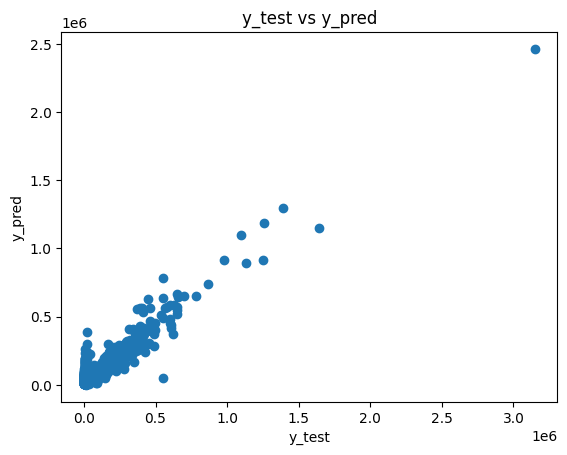

In [40]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('y_test vs y_pred')
plt.show()


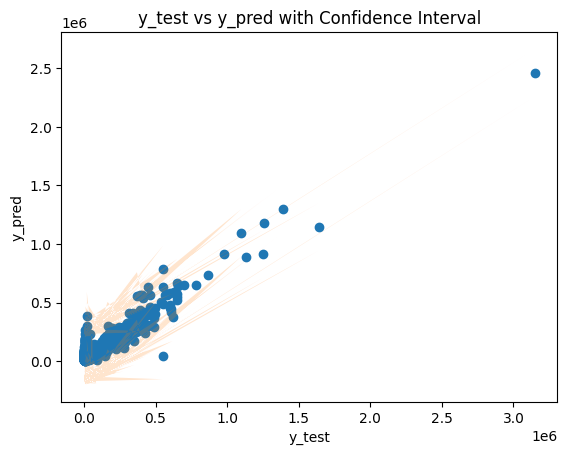

In [41]:
import matplotlib.pyplot as plt
import numpy as np

y_pred_upper = y_pred + 1.96 * np.std(y_pred)
y_pred_lower = y_pred - 1.96 * np.std(y_pred)

plt.scatter(y_test, y_pred)
plt.fill_between(y_test, y_pred_lower, y_pred_upper, alpha=0.2)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('y_test vs y_pred with Confidence Interval')
plt.show()


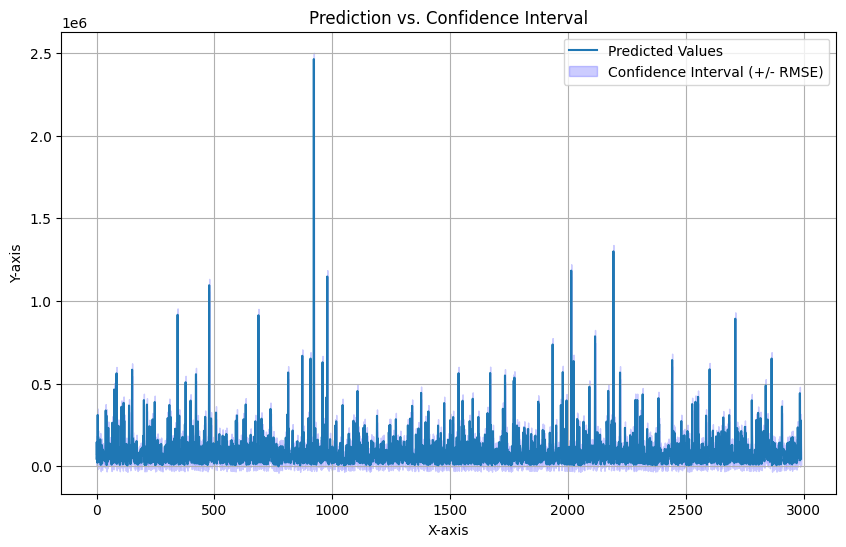

In [42]:

 # Replace with your actual predictions
rmse = 38499.21000364718  # Replace with your actual RMSE value

# Upper and lower confidence interval bounds (+/- RMSE)
y_upper = y_pred + rmse
y_lower = y_pred - rmse

# Original data (replace with your actual data if available)
# You can plot this if you have the original data for comparison
# x_data = np.linspace(0, 100, 100)  # Replace with your actual x-values
# y_data = np.sin(x_data) + np.random.randn(100) * 0.2  # Replace with your actual y-values

# Plotting
plt.figure(figsize=(10, 6))

# Plot predicted values
plt.plot(y_pred, label='Predicted Values')

# Shade the confidence interval area
plt.fill_between(np.arange(len(y_pred)), y_upper, y_lower, alpha=0.2, color='b', label='Confidence Interval (+/- RMSE)')

# Plot original data (if available)
# plt.plot(x_data, y_data, 'o', label='Original Data')  # Uncomment if you have original data

# Labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Prediction vs. Confidence Interval')

# Legend
plt.legend()

# Grid
plt.grid(True)

plt.show()

In [43]:
from xgboost import XGBRegressor
X_test = pd.DataFrame({'brand': ['Kia'], 'model': ['Picanto'], 'year': [2021], 'distance_control': [1], 'economical': [0], 'fuel_type': ['petrol'], 'hand_num': [1], 'cruise_control': [0], 'engine_volume': [1.0], 'magnesium_wheels': [1], 'car_name_en': ['Kia Picanto'], 'horse_power': [67.0], 'valid_test': [1], 'adaptive_cruise_control': [0], '4x4': [0]})
model = XGBRegressor()
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
y_pred = pipeline.fit(X, y).predict(X_test)[0]
print(f'Predicted price for Kia Picanto using XGBRegressor: {y_pred}')


Predicted price for Kia Picanto using XGBRegressor: 66936.8671875


In [45]:
import pandas as pd

years = list(range(2012, 2024))
data = {'year': years}
df_years = pd.DataFrame(data)

for year in years:
    X_test = pd.DataFrame({'brand': ['Kia'], 'model': ['Picanto'], 'year': [year], 'distance_control': [1], 'economical': [0], 'fuel_type': ['petrol'], 'hand_num': [1], 'cruise_control': [0], 'engine_volume': [1.0], 'magnesium_wheels': [1], 'car_name_en': ['Kia Picanto'], 'horse_power': [67.0], 'valid_test': [1], 'adaptive_cruise_control': [0], '4x4': [0]})
    model = XGBRegressor()
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    y_pred = pipeline.fit(X, y).predict(X_test)[0]
    print(f'Predicted price for Kia Picanto in {year} using XGBRegressor: {y_pred}')



Predicted price for Kia Picanto in 2012 using XGBRegressor: 17876.81640625
Predicted price for Kia Picanto in 2013 using XGBRegressor: 20624.62890625
Predicted price for Kia Picanto in 2014 using XGBRegressor: 22813.796875
Predicted price for Kia Picanto in 2015 using XGBRegressor: 25887.0546875
Predicted price for Kia Picanto in 2016 using XGBRegressor: 29019.724609375
Predicted price for Kia Picanto in 2017 using XGBRegressor: 32823.359375
Predicted price for Kia Picanto in 2018 using XGBRegressor: 42322.8671875
Predicted price for Kia Picanto in 2019 using XGBRegressor: 49929.08203125
Predicted price for Kia Picanto in 2020 using XGBRegressor: 58338.83203125
Predicted price for Kia Picanto in 2021 using XGBRegressor: 66936.8671875
Predicted price for Kia Picanto in 2022 using XGBRegressor: 73709.2421875
Predicted price for Kia Picanto in 2023 using XGBRegressor: 77970.8984375


In [48]:
def get_car_info(brand, model):
    mean_price = df.loc[(df['brand'] == brand[0]) & (df['model'] == model[0]), 'price'].mean()
    min_price = df.loc[(df['brand'] == brand[0]) & (df['model'] == model[0]), 'price'].min()
    max_price = df.loc[(df['brand'] == brand[0]) & (df['model'] == model[0]), 'price'].max()
    count_cars = df.loc[(df['brand'] == brand[0]) & (df['model'] == model[0]), 'price'].count()
    print(f'Mean price over years: {mean_price}')
    print(f'Min price: {min_price}')
    print(f'Max price: {max_price}')
    print(f'Count of cars: {count_cars}')

get_car_info(['Kia'], ['Picanto'])


Mean price over years: 45125.34005763689
Min price: 1000.0
Max price: 90000.0
Count of cars: 347


In [49]:
unique_brand_model_pairs = df[['brand', 'model']].drop_duplicates()
print(unique_brand_model_pairs)

for index, row in unique_brand_model_pairs.iterrows():
    print(f"Calculations for {row['brand']} {row['model']}:")
    get_car_info([row['brand']], [row['model']])



               brand              model
0      Mercedes-Benz            A-Class
1                BMW           7 Series
2         Alfa Romeo             Giulia
3      Mercedes-Benz            S-Class
4                BMW           3 Series
...              ...                ...
15305        Pontiac           Solstice
15316          Mazda          B2500 4X4
15318           Opel  And Yoro Are Long
15338        Renault             Twingo
15441            Wey     Kofi 01 Coffee

[755 rows x 2 columns]
Calculations for Mercedes-Benz A-Class:
Mean price over years: 146193.5483870968
Min price: 5000.0
Max price: 419000.0
Count of cars: 31
Calculations for BMW 7 Series:
Mean price over years: 221756.73076923078
Min price: 9000.0
Max price: 495000.0
Count of cars: 26
Calculations for Alfa Romeo Giulia:
Mean price over years: 147385.7142857143
Min price: 92400.0
Max price: 215000.0
Count of cars: 7
Calculations for Mercedes-Benz S-Class:
Mean price over years: 161892.11111111112
Min price: 2999

In [50]:
calculations_df = pd.DataFrame(columns=['brand', 'model', 'mean_price', 'min_price', 'max_price', 'count_cars'])

data = []
for index, row in unique_brand_model_pairs.iterrows():
    brand = row['brand']
    model = row['model']
    mean_price = df.loc[(df['brand'] == brand) & (df['model'] == model), 'price'].mean()
    min_price = df.loc[(df['brand'] == brand) & (df['model'] == model), 'price'].min()
    max_price = df.loc[(df['brand'] == brand) & (df['model'] == model), 'price'].max()
    count_cars = df.loc[(df['brand'] == brand) & (df['model'] == model), 'price'].count()
    data.append({'brand': brand, 'model': model, 'mean_price': mean_price, 'min_price': min_price, 'max_price': max_price, 'count_cars': count_cars})

calculations_df = pd.DataFrame(data)

calculations_df


,brand,model,mean_price,min_price,max_price,count_cars
0,Mercedes-Benz,A-Class,146193.548387,5000.0,419000.0,31
1,BMW,7 Series,221756.730769,9000.0,495000.0,26
2,Alfa Romeo,Giulia,147385.714286,92400.0,215000.0,7
3,Mercedes-Benz,S-Class,161892.111111,2999.0,409999.0,27
4,BMW,3 Series,162177.776000,1000.0,370000.0,125
...,...,...,...,...,...,...
750,Pontiac,Solstice,69900.000000,69900.0,69900.0,1
751,Mazda,B2500 4X4,25000.000000,25000.0,25000.0,1
752,Opel,And Yoro Are Long,85000.000000,85000.0,85000.0,1
753,Renault,Twingo,30000.000000,30000.0,30000.0,1


In [51]:
calculations_df.to_csv('statictics_by)beand-model.csv')
df.to_csv('11-06-24_for_visual.csv')

In [64]:
from openai import OpenAI
import api_keys_chat

api_key = api_keys_chat.api_key
client = OpenAI(api_key=api_key)

def generate_answer(text):
    client = OpenAI(api_key=api_key)
    try:
        response = client.chat.completions.create(
            model="gpt-4",
            messages=[
                {"role": "user", "content": text},
            ]
        )

        result = ''
        for choice in response.choices:
            result += choice.message.content

    except Exception as e:
        return f"Oops!! Some problems with openAI. Reason: {e}"

    return result

In [65]:
def get_brand_model(car_name):
    response = generate_answer(f"Extract brand and model from: {car_name}. You should return only brand and model separated with ';' and nothing else. Do not write anything except the brand and model separated by ';'. If it is written in hebrew traslate it to english.")
    parts = response.split(';')
    if len(parts) == 2:
        brand, model = parts
    else:
        brand, model = 'Unknown', 'Unknown'
    return brand, model

def get_country(model):
    response = generate_answer(f"Extract country from: {model}. You should return only country name based on the model name. If it is written in hebrew traslate it to english. If you do not know the country for brand return 'Unknown'")
    if response:
        return response
    else:
        return 'Unknown'